### Analyze and Provide Insights on Amazon Sales Report

### This is the data of Amazon Sales Report and The Company want to Know following information:-

1. Understand the overall sales performance, trends, and patterns over time. ?
2. Analyze the distribution of product categories, sizes, and quatities sold to idetify popular products?
3. Segment customers based on their buying behaviour, location, and other relevant factors.
4. Explore the geographical distribtion of sales, focusing on states and cities. 

In [1]:
# import common library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
data_df = pd.read_csv('Amazon Sale Report.csv')
data_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [3]:
data = pd.read_csv("Amazon Sale Report.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# properties of the dataframe object
print(data.size)
print(data.shape)
print(len(data))

2450544
(128976, 19)
128976


In [26]:
# summarize the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
# know about missing values
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [16]:
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [7]:
# print the columns name
data_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

### Duplicate Row

In [70]:
# check for duplicacy
data.duplicated().sum()

168

In [71]:
# knowing the duplicate row
data[data.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
201,6,408-5748499-6859555,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
202,7,406-7807733-3785945,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
203,8,407-5443024-5233168,4/30/2022,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
204,9,402-4393761-0311520,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN
205,10,407-5633625-6970741,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,4/26/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,582.0,HYDERABAD,TELANGANA,500083.0,IN,False,Easy Ship
6641,6279,403-8137343-5206760,4/26/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,801.0,KALPETTA,KERALA,673122.0,IN,False,Easy Ship
6642,6280,408-1575454-3263526,4/26/2022,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,690.0,CHENNAI,TAMIL NADU,600049.0,IN,False,Easy Ship
6643,6281,171-2918708-7197155,4/26/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,1,INR,658.0,PUNE,MAHARASHTRA,412207.0,IN,False,Easy Ship


In [72]:
# drop the duplicate row
data.drop_duplicates(keep = 'first', inplace = True)
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [73]:
# check for duplicacy
data.duplicated().sum()

0

### Univariate Analysis

In [8]:
# Courier Status
data['Courier Status'].value_counts()

Shipped       109486
On the Way      6870
Unshipped       6680
Cancelled       5940
Name: Courier Status, dtype: int64

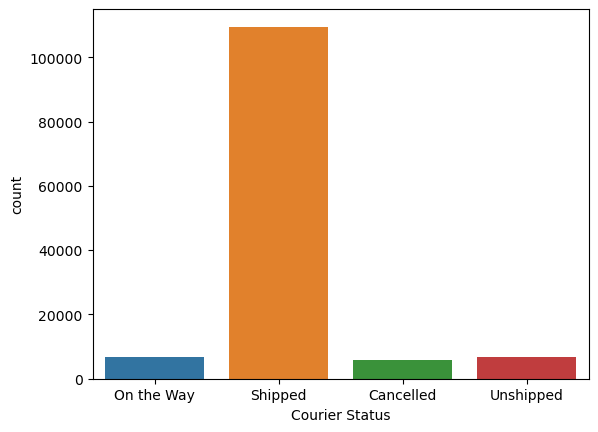

In [9]:
sns.countplot(x = data['Courier Status'])
plt.show()

In [10]:
# Category
data['Category'].value_counts()

T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: Category, dtype: int64

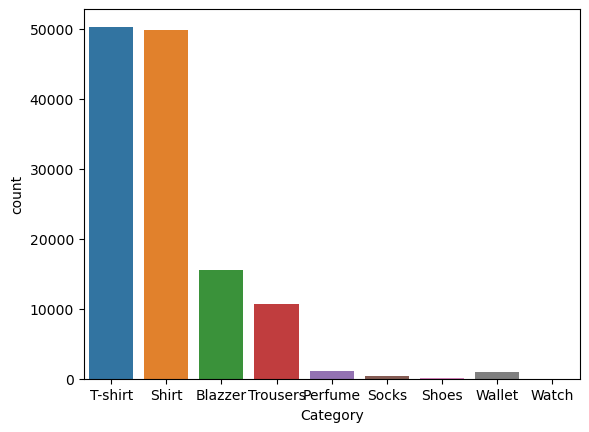

In [11]:
sns.countplot(x = data['Category'])
plt.show()

In [12]:
# ship-city
data['ship-city'].value_counts()

BENGALURU                11208
HYDERABAD                 8077
MUMBAI                    6125
NEW DELHI                 5792
CHENNAI                   5430
                         ...  
PERUMBALA                    1
SONGADH TAPI DISTRICT        1
oodlabari                    1
Batika                       1
Halol                        1
Name: ship-city, Length: 8948, dtype: int64

In [13]:
# ship-service-level
data['ship-service-level'].value_counts()

Expedited    88630
Standard     40346
Name: ship-service-level, dtype: int64

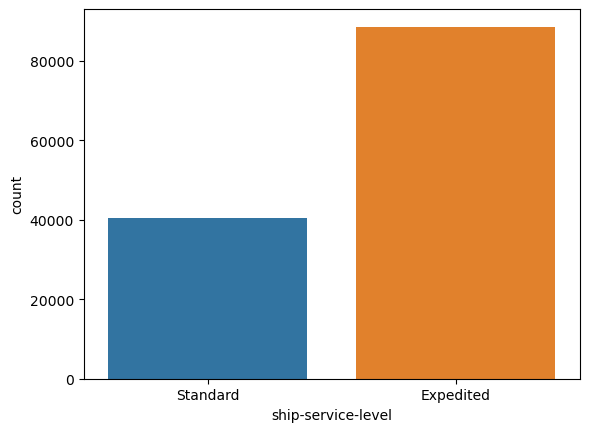

In [13]:
sns.countplot(x = data['ship-service-level'])
plt.show()

In [14]:
# Status
data['Status'].value_counts()

Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [32]:
# B2B
data['B2B'].value_counts()

False    128104
True        872
Name: B2B, dtype: int64

In [33]:
# import the package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

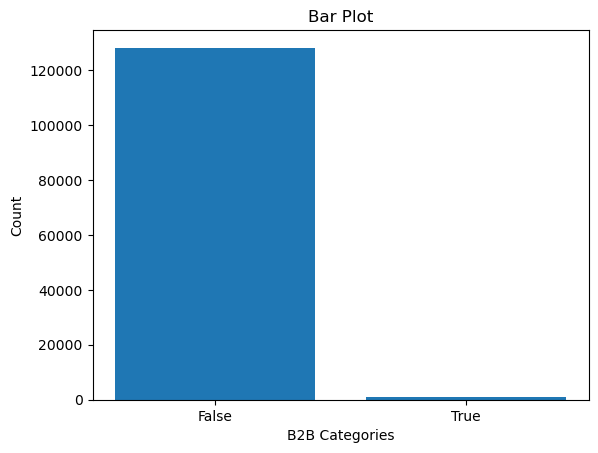

In [35]:
# bar plot
B2B = [128104,872]
categories = ['False','True']
plt.bar(categories,B2B)
plt.xlabel("B2B Categories")
plt.ylabel("Count")
plt.title('Bar Plot')
plt.show()

In [39]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,128976.0,64486.130427,37232.897832,0.0,32242.75,64486.5,96730.25,128974.0
Qty,128976.0,0.904401,0.313368,0.0,1.00,1.0,1.00,15.0
Amount,121176.0,648.562176,281.185041,0.0,449.00,605.0,788.00,5584.0
ship-postal-code,128941.0,463945.677744,191458.488954,110001.0,382421.00,500033.0,600024.00,989898.0


In [40]:
# creating a copy of data
data = data.copy()

In [41]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [42]:
data = data[['index','Date','Status','Fulfilment','Sales Channel','ship-service-level','Category','Size','Courier Status','Qty','currency','Amount','ship-city','ship-state','ship-postal-code','ship-country','B2B','fulfilled-by']]

In [43]:
data.head()

,index,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [44]:
data['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

### Exploratory Data Analysis

In [74]:
# help to understand the quality and replationship of data

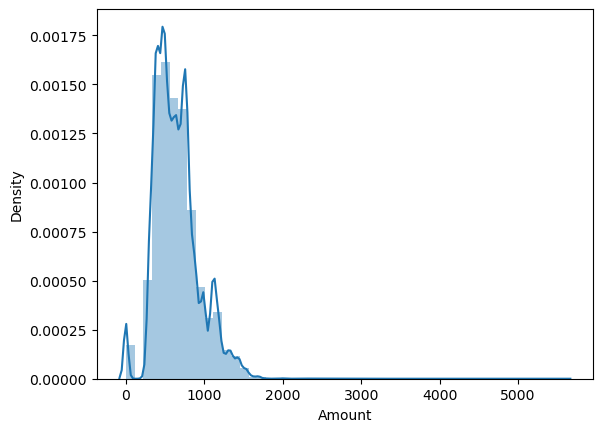

In [77]:
#plotting a distribution for input
sns.distplot(data['Amount'])
plt.show()

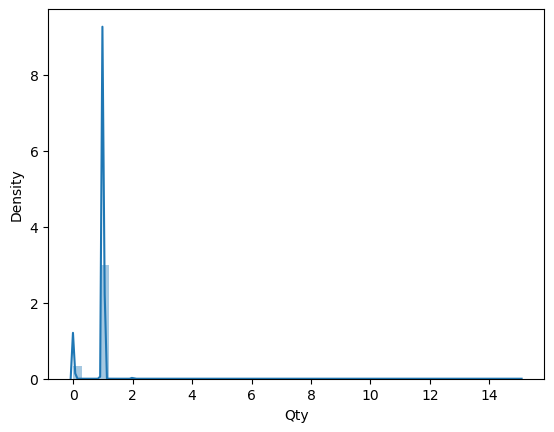

In [78]:
#plotting a distribution for output
sns.distplot(data['Qty'])
plt.show()

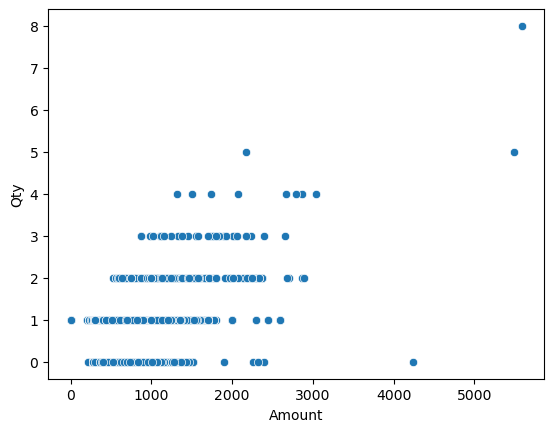

In [79]:
#Bivariate analysis
sns.scatterplot(x = data['Amount'],y = data['Qty'])
plt.show()

In [80]:
data.corr()

,index,Qty,Amount,ship-postal-code,B2B
index,1.000000,0.010726,0.047283,0.003801,-0.006332
Qty,0.010726,1.000000,0.066792,-0.010258,0.015796
Amount,0.047283,0.066792,1.000000,-0.038315,0.015694
ship-postal-code,0.003801,-0.010258,-0.038315,1.000000,-0.035667
B2B,-0.006332,0.015796,0.015694,-0.035667,1.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128808 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128808 non-null  int64  
 1   Order ID            128808 non-null  object 
 2   Date                128808 non-null  object 
 3   Status              128808 non-null  object 
 4   Fulfilment          128808 non-null  object 
 5   Sales Channel       128808 non-null  object 
 6   ship-service-level  128808 non-null  object 
 7   Category            128808 non-null  object 
 8   Size                128808 non-null  object 
 9   Courier Status      128808 non-null  object 
 10  Qty                 128808 non-null  int64  
 11  currency            121019 non-null  object 
 12  Amount              121019 non-null  float64
 13  ship-city           128775 non-null  object 
 14  ship-state          128775 non-null  object 
 15  ship-postal-code    128775 non-nul

In [82]:
#separating input and output
X  = data[['Amount']]
y = data['Qty']

In [83]:
type(X)

pandas.core.frame.DataFrame

In [84]:
type(y)

pandas.core.series.Series

In [85]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [86]:
print(X_train.shape, X_test.shape)

(103046, 1) (25762, 1)


In [45]:
data_df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [46]:
# Check for data imbalance
data_df['Qty'].value_counts(normalize= True)

1     0.897679
0     0.099321
2     0.002636
3     0.000248
4     0.000070
5     0.000016
15    0.000008
9     0.000008
13    0.000008
8     0.000008
Name: Qty, dtype: float64

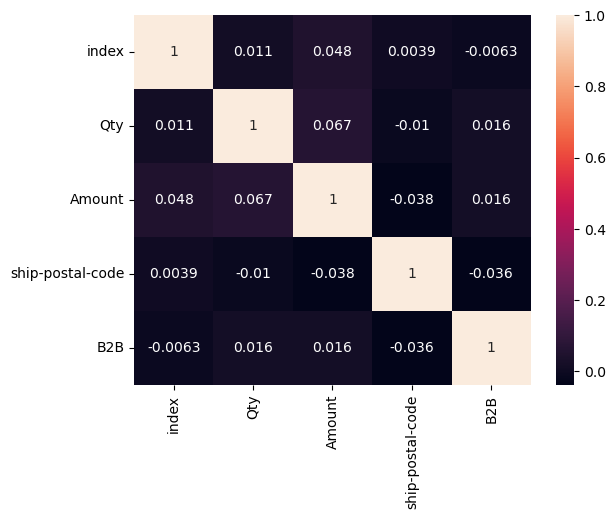

In [47]:
# perform a correlation analysis
corr_mat = data_df.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

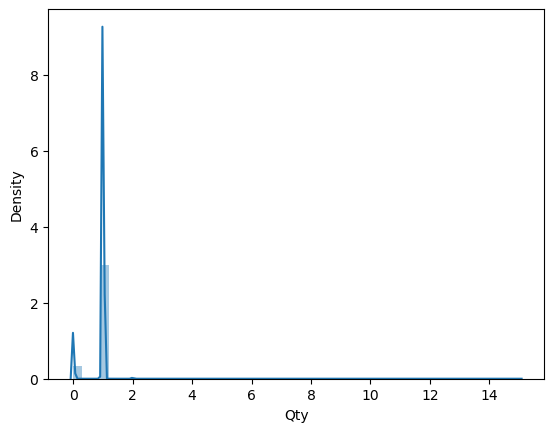

In [48]:
# help to understand the quality and replationship of data
#plotting a distribution for input
sns.distplot(data['Qty'])
plt.show()

### Bivariate Analysis

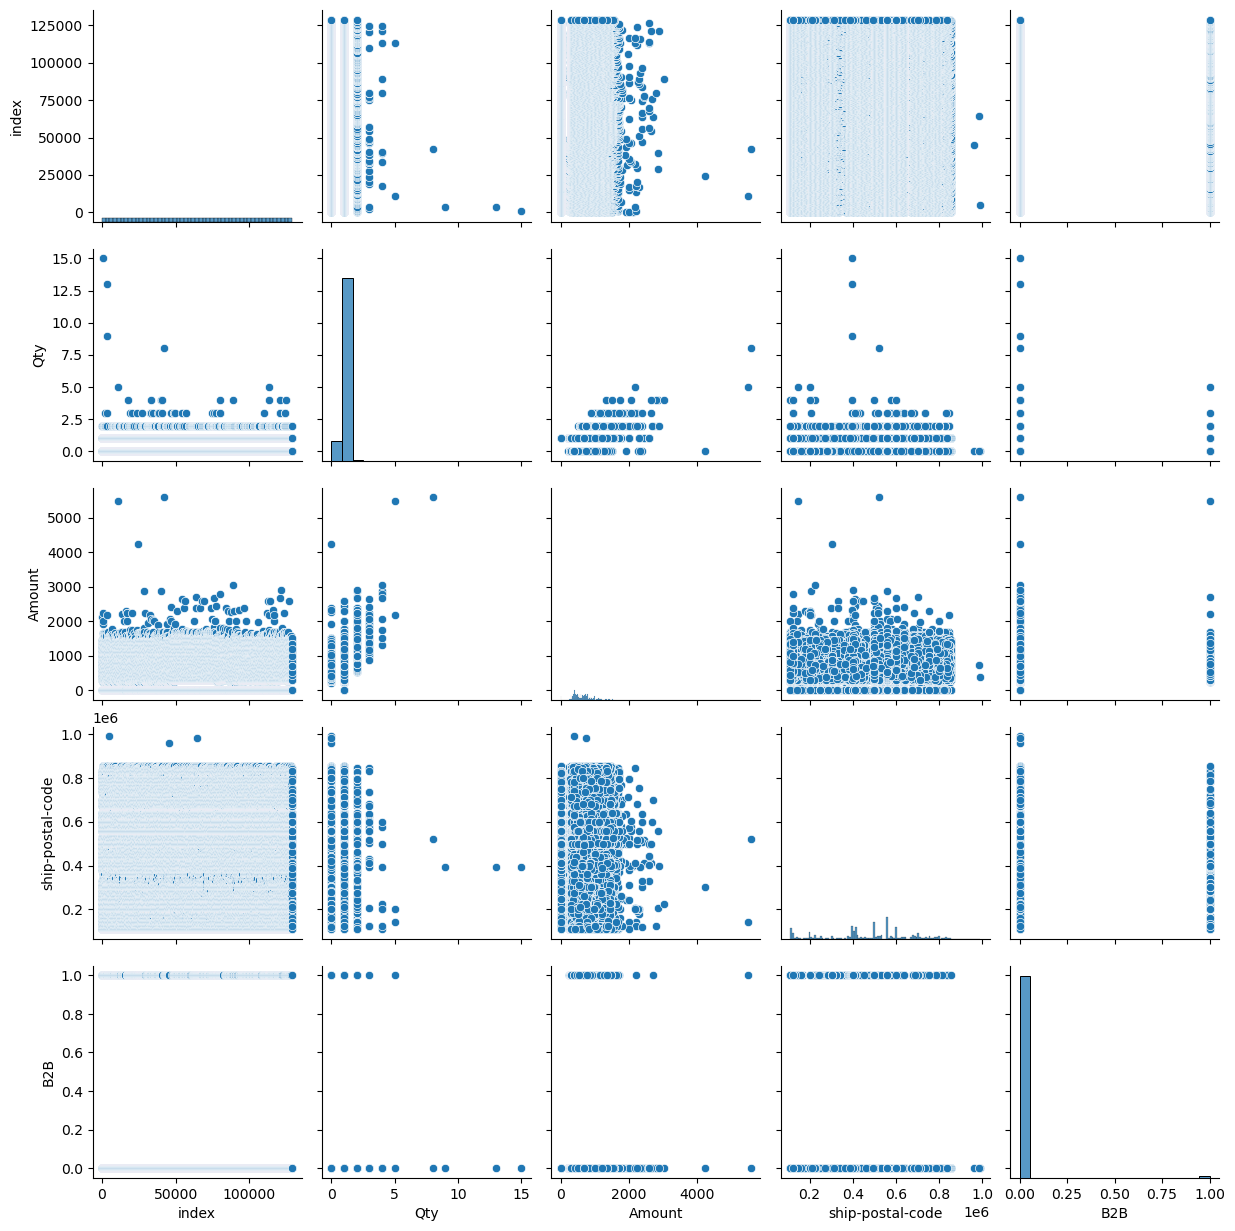

In [59]:
sns.pairplot(data)
plt.show()

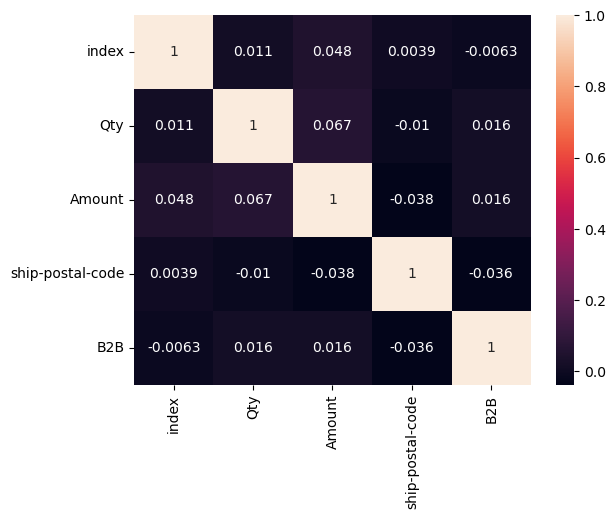

In [60]:
sns.heatmap(data.corr(),annot= True)
plt.show()

In [62]:
# Seaprating input and output
X = data.drop(['Qty'],axis =1)
y = data['Qty']

In [64]:
#spliting the data int on train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [65]:
print(X_train.shape,X_test.shape)

(96732, 18) (32244, 18)


In [66]:
data = pd.read_csv("Amazon Sale Report.csv")
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [67]:
# Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [68]:
print(X_train.shape, X_test.shape)

(103180, 18) (25796, 18)


### Expected Outcome

### Detailed Insights:
1. T-Shirts Sales in Bengaluru :

- High Demand: T-Shirts are the most popular product in Bengluru. This suggests a strong consumer preference for T-Shirts in this city.

- Industry Influence : Bengaluru, known as the "Silicon Valley of India," has a large IT and tech industry. This urban landscape attracts a diverse, young, and fashion-conscious workforce, which might contribute to the high demand for casual and trendy T-Shirts.


### 2. Analysis of Bengaluru Market:

- Demographic Insights:
  - Age Group: Bengaluru has a significant population of young professionals, students, and tech-savvy individuals who might prefer casual, versatile clothing like T-Shirts.
  - Income Levels: The presence of a high-income group working in IT and related sectors could drive demand for both affordable and premium T-Shirts.
- Lifestyle and Preferences:
  - Casual Wear Preference: The tech industry's work culture often supports casual attire, making T-Shirts a staple in the wardrobe of many residents.
  - Fashion Trends : Bengaluru's vibrant fashion scene may influence T-Shirt designs and trends, such as graphic tees, branded merchandise, or innovative fabrics.

- Seasonality and Weather:
  - Climate : Bengaluru enjoys a moderate climate, which can make T-Shirts a year-round clothing choice.
  -  Events and Festivals : Local events, tech conferences, and festivals may contribute to increased T-Shirt sales during specific periods.


### 3. Comparative Analysis with Other Cities:

- Market Comparison :
  - Compare T-Shirt sales in Bengaluru with other major cities like Mumbai, Delhi, and Hyderabad. This can reveal whether Bengaluru's demand is unique or part of a broader trend in urban areas.

- Product Preferences :
  - Identify if specific designs, brands, or types of T-Shirts are particularly popular in Bengaluru compared to other cities.


### 4. Strategic Implications:

- Marketing Strategies:
  - Targeted Campaigns: Develop marketing campaigns tailored to Bengaluru's demographic. Emphasize aspects like style, comfort, and tech-friendly features that appeal to young professionals.
  - Local Collaborations: Partner with local influencers, fashion designers, or tech companies for promotions and exclusive T-Shirt lines.

- Product Development:
  - Customization : Offer customization options for T-Shirts, such as tech-themed designs or local artwork.
  - Trendy Designs : Introduce designs that resonate with Bengaluru’s tech-savvy and fashion-conscious audience.

-  Retail and Distribution :
  - Local Presence : Consider establishing or enhancing retail presence in Bengaluru. This might include pop-up stores, partnerships with local boutiques, or presence in popular shopping areas.
  - E-commerce Strategies : Optimize online sales strategies for Bengaluru, such as targeted ads, localized promotions, or fast delivery options.


### 5. Data-Driven Decisions :

- Sales Tracking : Continuously monitor T-Shirt sales in Bengaluru to identify trends and adjust strategies accordingly.
-  Customer Feedback : Collect feedback from Bengaluru customers to refine product offerings and marketing approaches.


### Conclusion :

Bengaluru's strong demand for T-Shirts reflects both the city's dynamic tech-driven lifestyle and fashion preferences. By leveraging these insights, you can tailor your marketing and product strategies to capitalize on this high demand, ensuring that you meet the needs of this specific market effectively.
